Important Imports

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")

# For saving models
import pickle

#### Loading the Dataset


In [2]:
data=pd.read_csv('E:\HR_analytics\data\HR_analytics.csv')
df0= pd.DataFrame(data) 

In [3]:
# Function to print descriptive statistics in chunks
def describe_in_chunks(df, chunk_size):
    # Set display options to avoid truncation in the output
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    
    total_columns = df.shape[1]  # Total number of columns in the DataFrame
    for start in range(0, total_columns, chunk_size):
        end = start + chunk_size
        # Print descriptive statistics for each chunk
        print(f"Descriptive statistics for columns {start} to {min(end, total_columns)-1}")
        print(df.iloc[:, start:min(end, total_columns)].describe())
        print("\n")  # Print a newline for better separation between chunks

# Assuming df0 is your DataFrame and you want to process 13 columns at a time
describe_in_chunks(df0, 5)


Descriptive statistics for columns 0 to 4
               Age
count  1480.000000
mean     36.917568
std       9.128559
min      18.000000
25%      30.000000
50%      36.000000
75%      43.000000
max      60.000000


Descriptive statistics for columns 5 to 9
         DailyRate  DistanceFromHome    Education
count  1480.000000       1480.000000  1480.000000
mean    801.384459          9.220270     2.910811
std     403.126988          8.131201     1.023796
min     102.000000          1.000000     1.000000
25%     465.000000          2.000000     2.000000
50%     800.000000          7.000000     3.000000
75%    1157.000000         14.000000     4.000000
max    1499.000000         29.000000     5.000000


Descriptive statistics for columns 10 to 14
       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate
count         1480.0     1480.000000              1480.000000  1480.000000
mean             1.0     1031.860811                 2.724324    65.845270
std              0.0  

In [4]:
df0.head()


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [5]:
#a concise summary of the DataFrame
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [6]:
import pandas as pd

# Assuming df0 is your DataFrame
# Identify non-numerical columns
non_numerical_cols = df0.select_dtypes(include=['object']).columns

# Print non-numerical columns
print("Non-numerical columns:", non_numerical_cols)


Non-numerical columns: Index(['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab',
       'Over18', 'OverTime'],
      dtype='object')


In [7]:
# Loop through each non-numerical column and print the required information
for col in non_numerical_cols:
    print(f"--- Analyzing Column: {col} ---")
    # Get unique values
    unique_values = df0[col].unique()
    print(f"Unique Values in {col}: {unique_values}")

    # Get the top value and its frequency
    top_value = df0[col].mode()[0]  # mode() returns the most common value
    top_value_count = df0[col].value_counts().iloc[0]
    print(f"Most Frequent Value in {col}: {top_value} (Frequency: {top_value_count})\n")


--- Analyzing Column: EmpID ---
Unique Values in EmpID: ['RM297' 'RM302' 'RM458' ... 'RM537' 'RM880' 'RM1210']
Most Frequent Value in EmpID: RM1461 (Frequency: 2)

--- Analyzing Column: AgeGroup ---
Unique Values in AgeGroup: ['18-25' '26-35' '36-45' '46-55' '55+']
Most Frequent Value in AgeGroup: 26-35 (Frequency: 611)

--- Analyzing Column: Attrition ---
Unique Values in Attrition: ['Yes' 'No']
Most Frequent Value in Attrition: No (Frequency: 1242)

--- Analyzing Column: BusinessTravel ---
Unique Values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TravelRarely']
Most Frequent Value in BusinessTravel: Travel_Rarely (Frequency: 1042)

--- Analyzing Column: Department ---
Unique Values in Department: ['Research & Development' 'Sales' 'Human Resources']
Most Frequent Value in Department: Research & Development (Frequency: 967)

--- Analyzing Column: EducationField ---
Unique Values in EducationField: ['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Othe

#### BusinessTravel --- column shows redundant entry ('Travel_Rarely','TravelRarely') and it is the highest frequent value so we need to handle this in our duplicates processing for sure. 

## Handlling Missing Values 

In [8]:
# Check for missing values in each column
print(df0.isnull().sum())


#that is a good sign of the cleanininess of our data as there are no null vlues 
#except for 57 records out of 1457 features.
#we can impute them by filling missing values with the most frequent values

df0['YearsWithCurrManager'].fillna(df0['YearsWithCurrManager'].mode()[0], inplace=True)
print('nulls in -YearsWithCurrManager- after treating missing values:',df0['YearsWithCurrManager'].isnull().sum(),)




EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

### Years with current Manager shows 57 null values out of 1480 ,, while it may be not huge percent to consider dropping these records , we would rather impute the values but frst we should analyze variable distrbution to decide what kind of imputaton fits the variable 

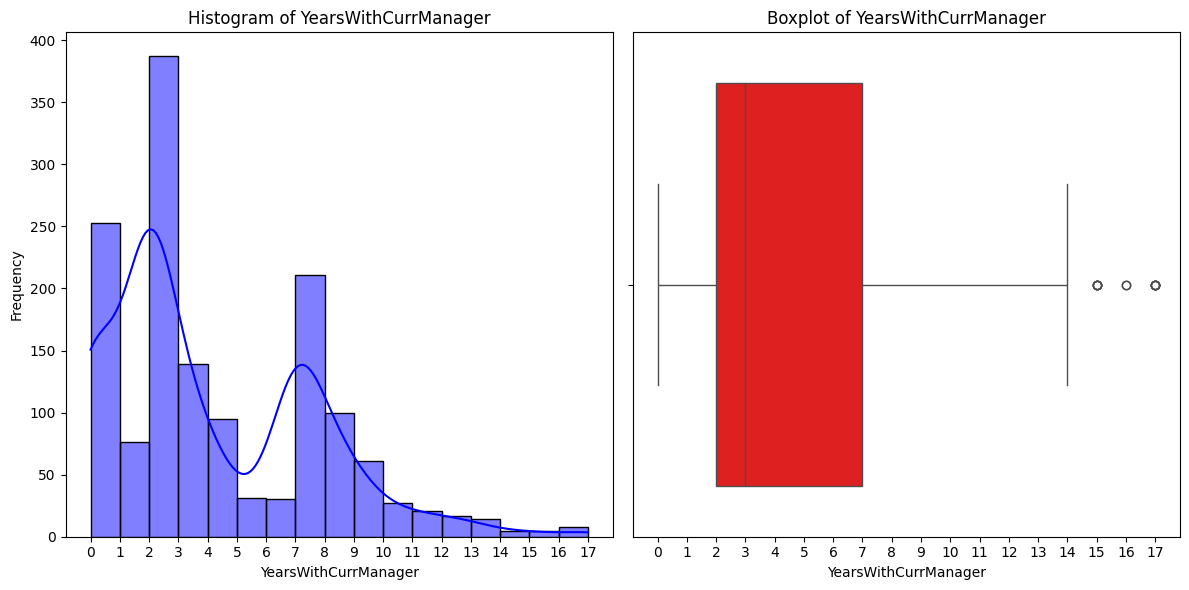

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df0 is your DataFrame and 'YearsWithCurrManager' is the column
data = df0['YearsWithCurrManager'].dropna()  # Dropping NaN to prepare for plotting

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot 1: Histogram with KDE
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
# Define bins from the minimum to the maximum value, ensuring whole numbers
bin_edges = np.arange(start=data.min(), stop=data.max() + 1, step=1)  # +1 to include the right edge
sns.histplot(data, bins=bin_edges, kde=True, color='blue')  # KDE is added here
plt.title('Histogram of YearsWithCurrManager')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Frequency')
plt.xticks(bin_edges)  # Ensure x-axis ticks are integers and match the bin edges

# Plot 2: Boxplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x=data, color='red')
plt.title('Boxplot of YearsWithCurrManager')
plt.xlabel('YearsWithCurrManager')

# Set x-axis for the boxplot to show integer labels (important if data has wide range)
plt.xticks(np.arange(data.min(), data.max() + 1, step=1))

# Display the plots
plt.tight_layout()
plt.show()


### the distribution of the "YearsWithCurrManager" variable is skewed to the right. The accompanying boxplot further clarifies the  distribution, showing that 50% of the employees have been with their current manager for no more than 3 years.  However, there are notable outliers with some employees having tenures of up to 15, 16, and 17 years with the same manager.
### The median, being the central value, more accurately represents the typical tenure of an employee with their manager, this will ensure that the the data we impute wll not be affected by the large numbers in the right tail if we used the Mean for imputaion

In [10]:
### miputing missing values using the mode 
median_value=df0['YearsWithCurrManager'].median()
df0['YearsWithCurrManager'].fillna(median_value, inplace=True)
# Now print the number of missing values after the imputation
missing_values_after_imputation = df0['YearsWithCurrManager'].isnull().sum()
print(f"Missing values after imputation in 'YearsWithCurrManager': {missing_values_after_imputation}")

Missing values after imputation in 'YearsWithCurrManager': 0


## handling duplicate records

we want to mantain integrty of our analysis against duplicate records of employees repeating entries 
so we check for duplicate among subset of the coulmns that uniquely identify records.
[EmpID,EmployeeNumbre] 

In [11]:
# Find and display duplicate rows , keep retrves all duplicates occured 
duplicates = df0[df0.duplicated(subset=['EmpID','EmployeeNumber'],keep=False)]
print(duplicates['EmpID'])

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")


161     RM1465
162     RM1465
210     RM1468
211     RM1468
327     RM1461
328     RM1461
457     RM1464
458     RM1464
654     RM1470
655     RM1470
802     RM1466
803     RM1466
952     RM1463
953     RM1467
954     RM1463
955     RM1467
1304    RM1469
1305    RM1469
1335    RM1462
1336    RM1462
Name: EmpID, dtype: object
Number of duplicate rows: 20


#### we can further anlayze the duplicated records to see if they mistakenly double entered records by 
#### employees , the idea is if we count distinct answers per dublicated employee we can know if he 
#### mistakenly double entered the survey or not, thus make a diciesion on duplicate records

In [12]:


unique_counts = duplicates.groupby('EmpID').agg(lambda x: x.nunique())
display(unique_counts)

#every duplicaetd employee entered the same answer twice,thus we will include their answers
#only once and delete the other records. 


,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RM1461,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RM1462,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RM1463,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RM1464,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RM1465,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
RM1466,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
RM1467,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
RM1468,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RM1469,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
df0 = df0.drop_duplicates(subset=['EmpID', 'EmployeeNumber'], keep='first') #keeps leaves the first
#occurance of duplicated record and deletes the rest, in our case (10/20)
print ('count after dropping duplicates',df0['EmpID'].count())

count after dropping duplicates 1470


In [14]:
# Replace 'TravelRarely' with 'Travel_Rarely'
df0['BusinessTravel'] = df0['BusinessTravel'].replace('TravelRarely', 'Travel_Rarely')

# Verify the replacement
print(df0['BusinessTravel'].unique())


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


### now we will drop some atributes that are found none relevant to our study or lacks desription or just hold a near constant values across all records

In [15]:
'''
columns_to_drop=['EmpID'
,'DailyRate'
,'Education'
,'EmployeeCount'## all values are '1'
,'EmployeeNumber'##a distinctive value for every employee
,'MaritalStatus'
,'SalarySlab'
,'Over18'## all values are (Yes)
,'PercentSalaryHike'
,'RelationshipSatisfaction'
,'StandardHours'## all values are '80' hours per week
,'StockOptionLevel'
,'TrainingTimesLastYear'
,'Age'
]
df1=df0.drop(columns=columns_to_drop)

SyntaxError: incomplete input (2283829112.py, line 1)

# Univariate Analysis

In [16]:
# Function to print counts and rounded percentages for each category after plotting, it will be called after each plot 
def print_attrition_details(grouped_data, category):
    print(f"\nAttrition details for {category}:")
    for index, row in grouped_data.iterrows():
        no_count = row['No'] if 'No' in row else 0
        yes_count = row['Yes'] if 'Yes' in row else 0
        total = no_count + yes_count
        no_percent = int((no_count / total) * 100) if total > 0 else 0
        yes_percent = int((yes_count / total) * 100) if total > 0 else 0
        print(f"{index}:  stayed ({no_percent}%),  left ({yes_percent}%) (Rounded)")


In [17]:
## this funcion defines my prefered foramt for ploting attrition by each category and then print the percent in details.
# to avoid redundacy, but you can change it based on yours prefrence.  
import pandas as pd
import matplotlib.pyplot as plt

def plot_and_print_attrition_details(df, category, color_no='green', color_yes='red'):
    """
    Plot attrition rates and print detailed counts and percentages for a specified category.

    Parameters:
    - df: DataFrame containing the data.
    - category: The column in DataFrame to group data by.
    - color_no: Color for the 'No' attrition bars.
    - color_yes: Color for the 'Yes' attrition bars.
    """
    # Grouping the data and normalizing it
    attrition_data = df.groupby(category)['Attrition'].value_counts(normalize=True).unstack()
    counts_data = df.groupby(category)['Attrition'].value_counts().unstack(fill_value=0)

    # Plotting the data
    attrition_data.plot(kind='bar', stacked=False, color=[color_no, color_yes])
    plt.title(f'Attrition Rates by {category}')
    plt.xlabel(category)
    plt.ylabel('Proportion of Attrition')
    plt.legend(title='Attrition', labels=['No', 'Yes'])
    plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])  # Format y-ticks as percentage
    plt.show()

    # Printing the attrition details
    print(f"\nAttrition details for {category}:")
    for index, row in counts_data.iterrows():
        no_count = row['No'] if 'No' in row else 0
        yes_count = row['Yes'] if 'Yes' in row else 0
        total = no_count + yes_count
        no_percent = int((no_count / total) * 100) if total > 0 else 0
        yes_percent = int((yes_count / total) * 100) if total > 0 else 0
        print(f"{index}: stayed ({no_percent}%), left ({yes_percent}%) (Rounded)")




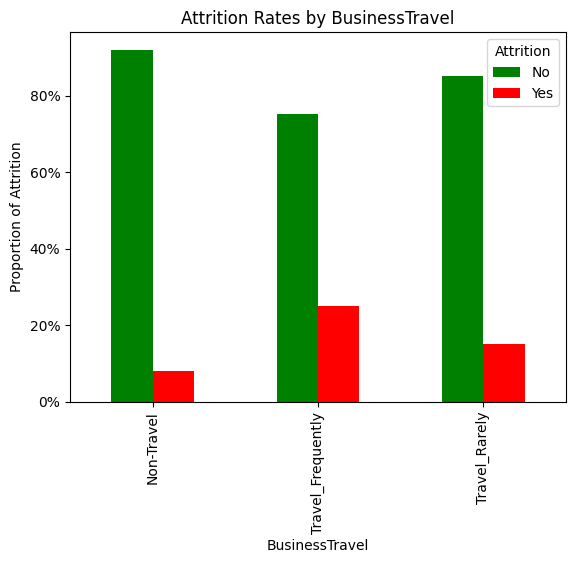


Attrition details for BusinessTravel:
Non-Travel: stayed (92%), left (8%) (Rounded)
Travel_Frequently: stayed (75%), left (24%) (Rounded)
Travel_Rarely: stayed (85%), left (14%) (Rounded)


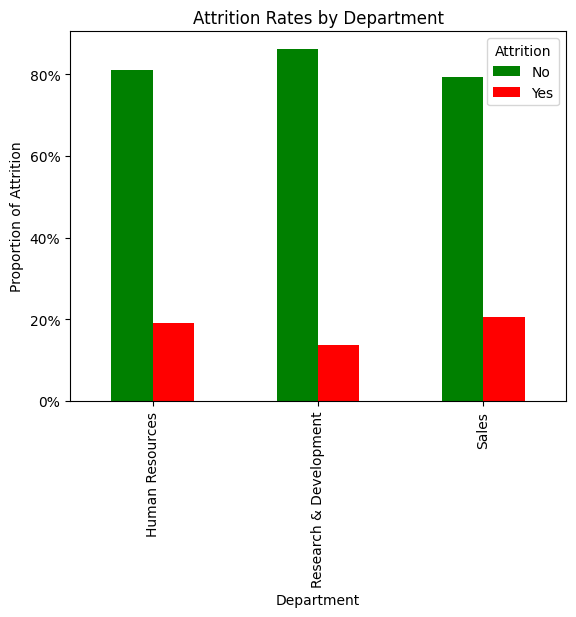


Attrition details for Department:
Human Resources: stayed (80%), left (19%) (Rounded)
Research & Development: stayed (86%), left (13%) (Rounded)
Sales: stayed (79%), left (20%) (Rounded)


In [18]:
# Example usage:
plot_and_print_attrition_details(df0, 'BusinessTravel')
plot_and_print_attrition_details(df0, 'Department')

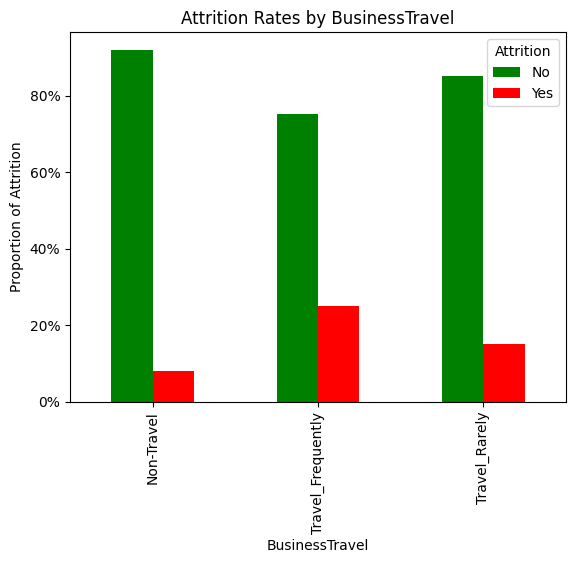


Attrition details for BusinessTravel:
Non-Travel: stayed (92%), left (8%) (Rounded)
Travel_Frequently: stayed (75%), left (24%) (Rounded)
Travel_Rarely: stayed (85%), left (14%) (Rounded)


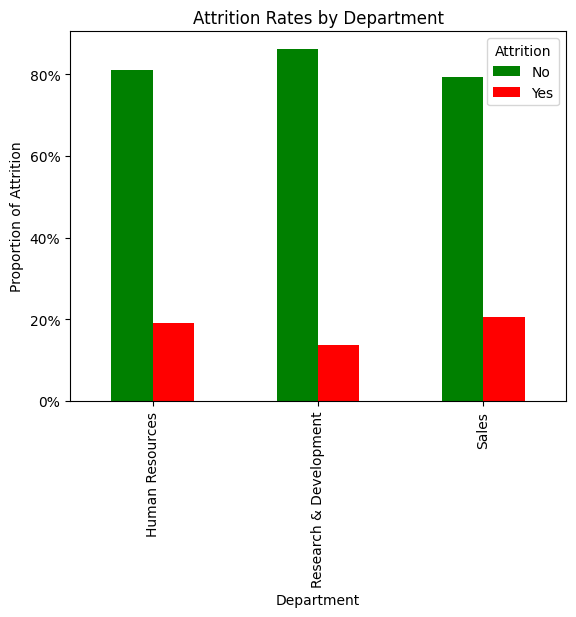


Attrition details for Department:
Human Resources: stayed (80%), left (19%) (Rounded)
Research & Development: stayed (86%), left (13%) (Rounded)
Sales: stayed (79%), left (20%) (Rounded)


In [19]:
# Example usage:
plot_and_print_attrition_details(df0, 'BusinessTravel')
plot_and_print_attrition_details(df0, 'Department')

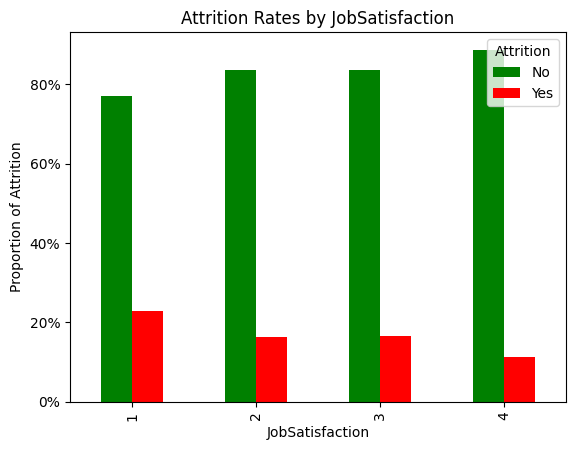


Attrition details for JobSatisfaction:
1: stayed (77%), left (22%) (Rounded)
2: stayed (83%), left (16%) (Rounded)
3: stayed (83%), left (16%) (Rounded)
4: stayed (88%), left (11%) (Rounded)


In [20]:
# Example usage:
plot_and_print_attrition_details(df0, 'JobSatisfaction')


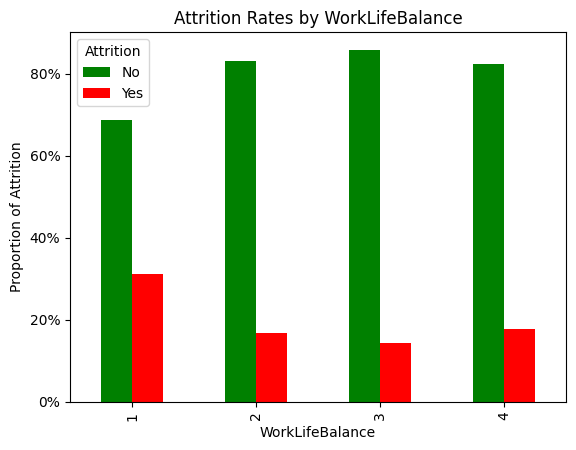


Attrition details for WorkLifeBalance:
1: stayed (68%), left (31%) (Rounded)
2: stayed (83%), left (16%) (Rounded)
3: stayed (85%), left (14%) (Rounded)
4: stayed (82%), left (17%) (Rounded)


In [21]:
# Example usage:
plot_and_print_attrition_details(df0, 'WorkLifeBalance')


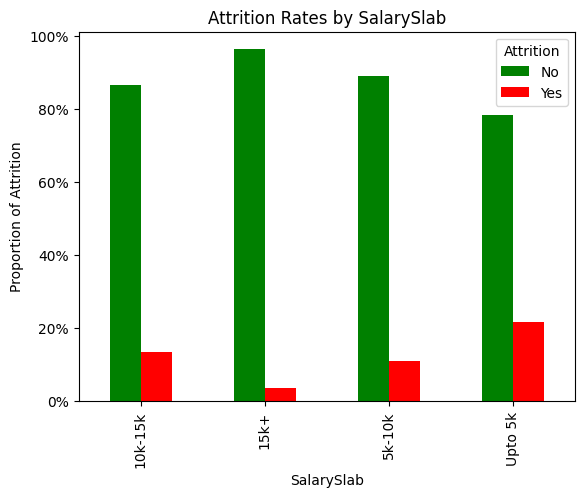


Attrition details for SalarySlab:
10k-15k: stayed (86%), left (13%) (Rounded)
15k+: stayed (96%), left (3%) (Rounded)
5k-10k: stayed (88%), left (11%) (Rounded)
Upto 5k: stayed (78%), left (21%) (Rounded)


In [22]:
plot_and_print_attrition_details(df0, 'SalarySlab')

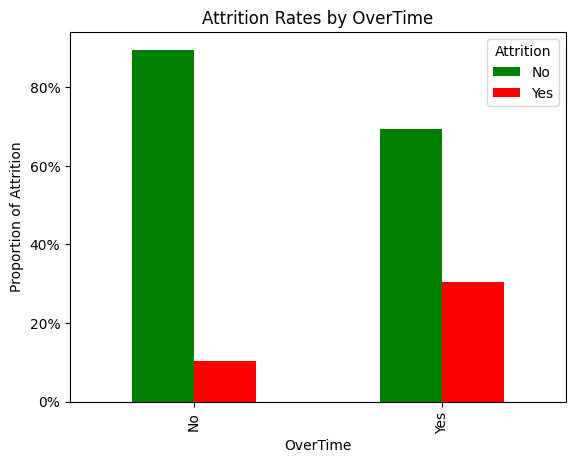


Attrition details for OverTime:
No: stayed (89%), left (10%) (Rounded)
Yes: stayed (69%), left (30%) (Rounded)


In [23]:
plot_and_print_attrition_details(df0, 'OverTime')

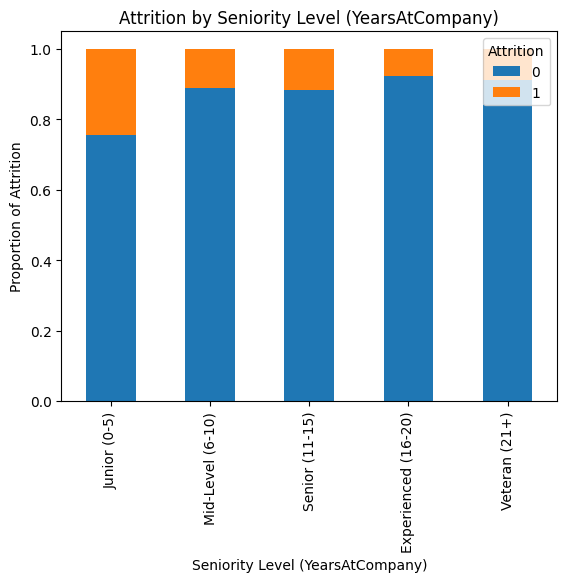

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

### here i didnt use our pre-defined plotting fanction because 'YeasrsAtCompany' was numerical and has large scale (from 0 to 40)
#so we needed to introduce Bins

# Define the bins for YearsAtCompany (wider ranges for longer tenures)
company_bins = [0, 5, 10, 15, 20, df0['YearsAtCompany'].max()]
company_labels = ['Junior (0-5)', 'Mid-Level (6-10)', 'Senior (11-15)', 'Experienced (16-20)', 'Veteran (21+)']


# Apply the bins to the respective columns
df1['Seniority_YearsAtCompany'] = pd.cut(df0['YearsAtCompany'], bins=company_bins, labels=company_labels, right=False)


# Plot Attrition by Seniority level for YearsAtCompany
df1.groupby('Seniority_YearsAtCompany')['Attrition'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Attrition by Seniority Level (YearsAtCompany)')
plt.xlabel('Seniority Level (YearsAtCompany)')
plt.ylabel('Proportion of Attrition')
plt.legend(title="Attrition", loc='upper right')
plt.show()



## Key Notes for Our Univariate Analysis

- 25% of juniors with (0-5) years at the company tend to leave 
- 30% of employees who worked over time tend to leave the company 
- 21% of employees who earn (up to 5k per mounth) leave
- 24% of employess who Travel Frequently 
- 31% of employees who vote for (1 out 4 start) at work-life balance rating tend to leave 


#### now as our data is clean we start analyzing  
## The Work Enviroment

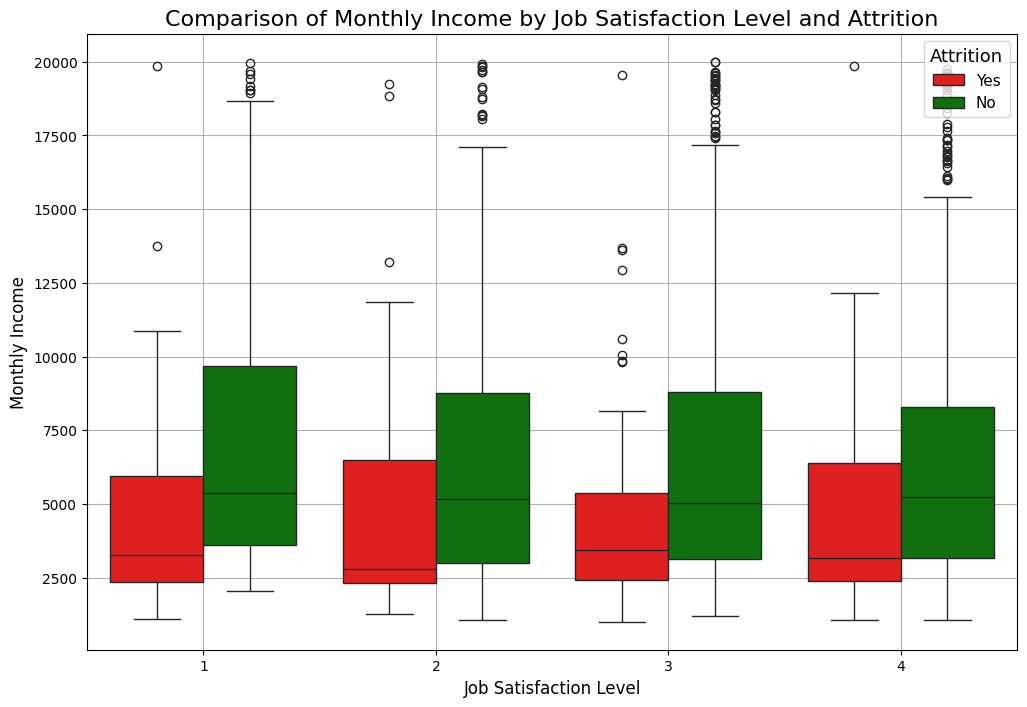

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df0 is your DataFrame and it includes the 'Attrition', 'JobSatisfaction', and 'MonthlyIncome' columns.

# Convert 'Attrition' to a categorical variable if it's not already
df0['Attrition'] = df0['Attrition'].apply(lambda x: 'Yes' if x == 'Yes' or x == 1 else 'No')

# Create a box plot
plt.figure(figsize=(12, 8))

# Using seaborn to create a boxplot that compares Monthly Income by Job Satisfaction and Attrition
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', hue='Attrition', data=df0, palette={'Yes': 'red', 'No': 'green'}, dodge=True)

# Adding labels and title
plt.title('Comparison of Monthly Income by Job Satisfaction Level and Attrition', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.legend(title='Attrition', loc='upper right', title_fontsize='13', fontsize='11')

plt.grid(True)
plt.show()


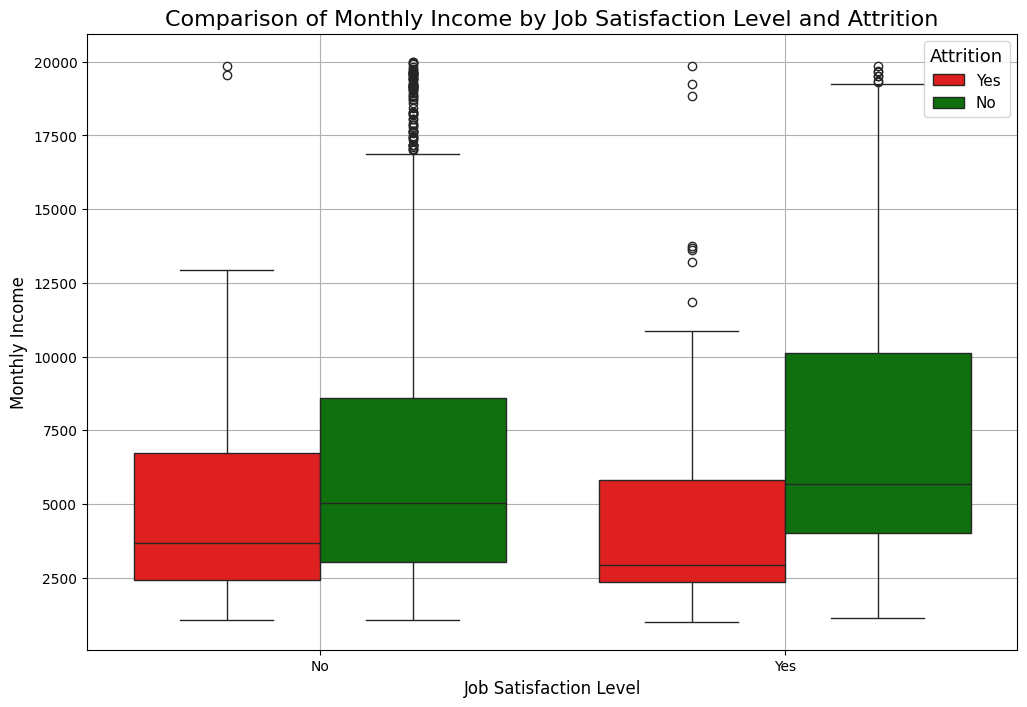

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df0 is your DataFrame and it includes the 'Attrition', 'JobSatisfaction', and 'MonthlyIncome' columns.

# Convert 'Attrition' to a categorical variable if it's not already
df0['Attrition'] = df0['Attrition'].apply(lambda x: 'Yes' if x == 'Yes' or x == 1 else 'No')

# Create a box plot
plt.figure(figsize=(12, 8))

# Using seaborn to create a boxplot that compares Monthly Income by Job Satisfaction and Attrition
sns.boxplot(x='OverTime', y='MonthlyIncome', hue='Attrition', data=df0, palette={'Yes': 'red', 'No': 'green'}, dodge=True)

# Adding labels and title
plt.title('Comparison of Monthly Income by Job Satisfaction Level and Attrition', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.legend(title='Attrition', loc='upper right', title_fontsize='13', fontsize='11')

plt.grid(True)
plt.show()


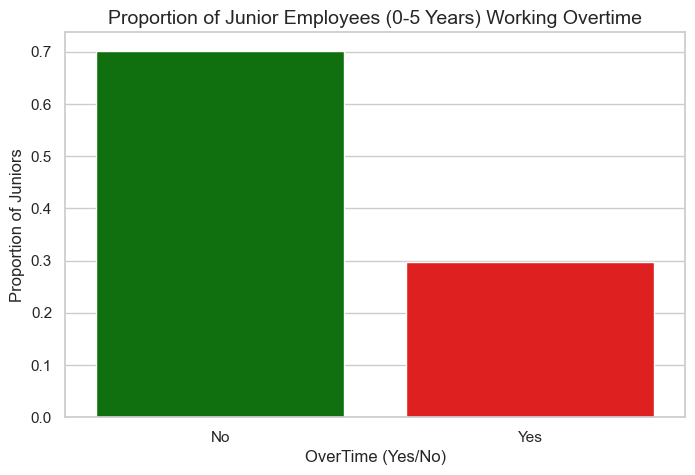

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define juniors as employees with 0-5 years at the company
juniors = df0[df0['YearsAtCompany'] <= 5]

# Calculate the proportion of juniors who work overtime
overtime_counts = juniors['OverTime'].value_counts(normalize=True)

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=overtime_counts.index, y=overtime_counts.values, palette=['green', 'red'])

# Adding title and labels
plt.title('Proportion of Junior Employees (0-5 Years) Working Overtime', fontsize=14)
plt.xlabel('OverTime (Yes/No)')
plt.ylabel('Proportion of Juniors')

# Show the plot
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Encode categorical variables
label_enc = LabelEncoder()
df0['OverTime'] = label_enc.fit_transform(df0['OverTime'])
df0['BusinessTravel'] = label_enc.fit_transform(df0['BusinessTravel'])
df0['Attrition'] = label_enc.fit_transform(df0['Attrition'])

# Select features
features = ['YearsAtCompany', 'OverTime', 'MonthlyIncome', 'BusinessTravel', 'WorkLifeBalance', 
            'JobSatisfaction', 'Age', 'TotalWorkingYears']
X = df0[features]
y = df0['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicting the Test set results
y_pred = rf.predict(X_test)

# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[359   4]
 [ 65  13]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       363
           1       0.76      0.17      0.27        78

    accuracy                           0.84       441
   macro avg       0.81      0.58      0.59       441
weighted avg       0.83      0.84      0.80       441



In [31]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance)

             Feature  Importance
2      MonthlyIncome    0.260089
6                Age    0.197642
7  TotalWorkingYears    0.143519
0     YearsAtCompany    0.129030
5    JobSatisfaction    0.079986
4    WorkLifeBalance    0.073065
1           OverTime    0.065201
3     BusinessTravel    0.051468
